# <span style="color:rebeccapurple">Python Machine Learning with scikit-learn</span>

## <br><span style="color:rebeccapurple">ML workflow steps:</span>

1. State the problem
2. Gather the data
3. Pre-process the data
4. Establish a baseline
5. Choose a model
6. Train the model
7. Optimize the model
8. Validate the model
9. Predict unknown data points using the model
10. Interpret and evaluate the model

In [3]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [4]:
# setting some figure display paramaters
sns.set_context('notebook')
sns.set_style('white', {'axes.linewidth': 0.5})
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

plt.rcParams['figure.dpi'] = 150
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['legend.edgecolor'] = 'w'

## <span style="color:rebeccapurple">1. State the problem</span></h1>

**Task:** Predict diabetes disease progression from patient characterisitics.

**Input:** Table of diabetic patient features

**Output:** Some metric of disease progression

## <span style="color:rebeccapurple">2. Gather and inspect the data</span></h1>

**Data:** Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [39]:
# Let's look at the data
df = pd.read_csv('data/diabetes.csv')

In [40]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,M,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,F,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,M,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,F,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,F,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [168]:
df.shape

(442, 11)

In [44]:
df.describe()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [42]:
df.groupby("SEX").mean()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
SEX,,,,,,,,,,
F,46.382979,26.010638,91.521957,187.995745,111.372340,54.385106,3.668468,4.567993,89.017021,149.021277
M,50.942029,26.790338,98.194783,190.439614,120.056039,44.570048,4.526377,4.724760,93.806763,155.666667


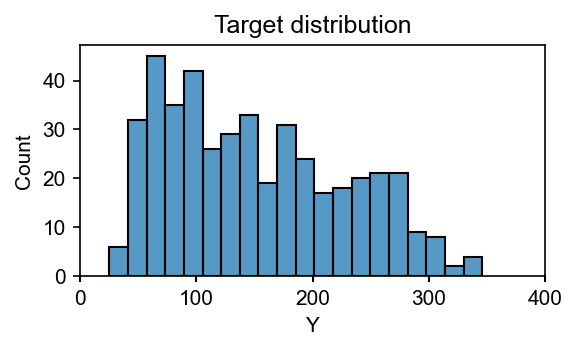

In [171]:
# Let's see what distribution of the output variable looks like
plt.figure(figsize=(4, 2))
sns.histplot(df['Y'], bins=20)
plt.xlim([0, 400])
plt.title('Target distribution')
plt.show()

<span style="color:#DC537D"><font size="+1">What is the input data for prediction?</font></span>

In [173]:
# select the input data
X = 

<span style="color:#DC537D"><font size="+1">What is the target to be predicted?</font></span>

In [174]:
# select the target labels
y = 

## <span style="color:rebeccapurple">3. Split the data into train and test</span></h1>
Ideally you want to separate the train and test sets very early on. I prefer to split them before pre-processing.

<span style="color:#DC537D"><font size="+1">Write code to split the dataset 80-20 train vs test</font></span>

In [119]:
# import the required function


In [124]:
# split the dataset


In [ ]:
# look at the dimensions of the split data


## <span style="color:rebeccapurple">4. Pre-process the training data</span>

<span style="color:#DC537D"><font size="+1">What kind of pre-processing does our dataset need?</font></span>

In [49]:
df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [ ]:
# list the numerical features
numeric_cols = 

In [ ]:
# list the categorical features
categorical_cols = 

In [ ]:
# ---------------- standardize numerical columns ---------------
# import scaler

# fit

# transform both train and test


In [ ]:
# ---------------- encode categorical columns ---------------
# import encoder

# fit

# transform both train and test


In [ ]:
# ---------------- stack the processed columns together---------------


<span style="color:#DC537D"><font size="+1">Does the target label need any encoding / transformation?</font></span>

## <span style="color:rebeccapurple">5. Establish a baseline</span></h1>

The simplest prediction you could make would be an "average diagnosis":

In [179]:
df["Y"].mean()

152.13348416289594

The error on this prediction can be calculated too. Suppose we decide to calculate the mean squared error (MSE)
$$MSE = \overline{(Observed - Expected)^2}$$

In [184]:
error = df["Y"] - df["Y"].mean()
squared_error = error**2
mean_squared_error = np.mean(squared_error)
mean_squared_error

5929.884896910383

The objective of model training or model optimization is to reduce the training error as much as possible, without over-fitting the model.

Note - Ideally you never see the test set, so the "average prediction" would be calculated over the train set only.

<span style="color:#DC537D"><font size="+1">Provide a baseline target prediction and mean squared error using the training set</font></span>

## <span style="color:rebeccapurple">6. Choose a model</span></h1>

<span style="color:#DC537D"><font size="+1">Is this a supervised or unsupervised learning task?</font></span>

<span style="color:#DC537D"><font size="+1">Is this a classification or regression task?</font></span>

<span style="color:#DC537D"><font size="+1">Are we predicting discrete or continuous values?</font></span>

Let's try to use a simple, interpretable model - a linear regressor

## <span style="color:rebeccapurple">7. Train the model</span></h1>

<span style="color:#DC537D"><font size="+1">Use sklearn to train a linear regression model</font></span>

In [ ]:
# import the model class 


In [ ]:
# create an instance of the model object
model = 

In [ ]:
# fit the model to the processed training data
model.

In [ ]:
# get the intercept and model coefficients
model.

In [ ]:
# get the coefficients inside a nice dataframe
feature_names = 

coefs = pd.DataFrame(data=  ,
                     columns= , 
                     index=  )

In [ ]:
# which features look most relevant?
coefs.plot.barh(figsize=(10, 4))
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient values")
plt.subplots_adjust(left=0.3)

## <span style="color:rebeccapurple">10. Predict values for the test set</span></h1>

<span style="color:#DC537D"><font size="+1">Generate predictions from your trained model</font></span>

In [ ]:
# generate predictions from your trained model
y_predicted_train = 
y_predicted_test = 

y_predicted_train.shape, y_predicted_test.shape

In [ ]:
# plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

axes[0].scatter(y_train, y_predicted_train, s=2)
axes[0].set_title("Train data")
axes[1].scatter(y_test, y_predicted_test, s=2)
axes[1].set_title("Test data")

for ax in axes:
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
    ax.set(xlabel="Observed y", ylabel="Predicted y")

## <span style="color:rebeccapurple">11. Evaluate the model</span>

<span style="color:#DC537D"><font size="+1">What is the $R^2$?</font></span>

In [ ]:
# import metric function


In [ ]:
# calculate metric for test


In [ ]:
# calculate metric for train


<span style="color:#DC537D"><font size="+1">What is the MSE?</font></span>

In [ ]:
# import metric function


In [ ]:
# calculate metric for test


In [ ]:
# calculate metric for train


# <span style="color:rebeccapurple">Bonus Questions</span>
Feel free to code out variations of the ML workflow to answer these questions

<span style="color:#DC537D"><font size="+1">Does changing the train-test split ratio improve the model?</font></span>
<br>Hint: does the fraction of the split matter, or does the sample size?

<span style="color:#DC537D"><font size="+1">Do you always get the same result when you randomly split the train and test sets multiple times?</font></span>
<br>Hint: think about the variance in the model

<span style="color:#DC537D"><font size="+1">Are the features and target variables normally distributed?</font></span>
<br>Hint: think about transforming individual features _before_ pre-processing to make it more normal-like

<span style="color:#DC537D"><font size="+1">Does scaling really matter?</font></span>
<br>Hint: don't pre-process the numerical columns before modeling and look at the coefficients